In [8]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [9]:
df = pd.read_csv('/Users/ieunseo/Desktop/통계/python_stat_sample-master/data/ch2_scores_em.csv', index_col='student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [11]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [12]:
scores_df = pd.DataFrame({'score':scores},
                         index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                          name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [13]:
sum(scores) / len(scores)

55.000

In [14]:
np.mean(scores)

55.000

In [15]:
scores_df.mean()

score    55.0
dtype: float64

In [16]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [17]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1) // 2 - 1]
median

56.500

In [18]:
np.median(scores)

56.500

In [19]:
scores_df.median()

score    56.5
dtype: float64

In [20]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [21]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [22]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [23]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [24]:
np.mean(deviation)

0.000

In [25]:
np.mean(another_deviation)

0.000

In [26]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [27]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [28]:
np.mean(deviation ** 2)

86.000

In [29]:
np.var(scores)

86.000

In [30]:
scores_df.var()

score    95.555556
dtype: float64

In [31]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [32]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [33]:
np.sqrt(np.var(scores, ddof = 0))

9.274

In [34]:
np.std(scores, ddof = 0)

9.274

In [35]:
np.max(scores) - np.min(scores)

np.int64(28)

In [36]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [37]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [38]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [39]:
np.mean(z), np.std(z, ddof = 0)

(-0.000, 1.000)

In [40]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [41]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [42]:
english_scores = np.array(df['english'])

pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [45]:
freq, _ = np.histogram(english_scores, bins = 10, range = (0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [46]:
freq_class = [f'{i} ~ {i+10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'frequency' : freq},
                            index = pd.Index(freq_class,
                                             name = 'class'))
freq_dist_df

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [47]:
for a in range(8):
    print(a)

0
1
2
3
4
5
6
7


In [52]:
for a in range(15, 4, -2):
    print(a)

15
13
11
9
7
5


In [53]:
for a in range(20, 40, 5):
    print(a)

20
25
30
35


In [54]:
total = 0
for i in range(1,10):
    total = total + i
print(total)

45


In [55]:
total = 0
for i in range(1, 10, 2):
    total = total + i
print(total)

25


In [56]:
class_value = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [57]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [58]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [59]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df                         

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


In [61]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

np.int64(65)

In [65]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]


In [66]:
import matplotlib.pyplot as plt

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


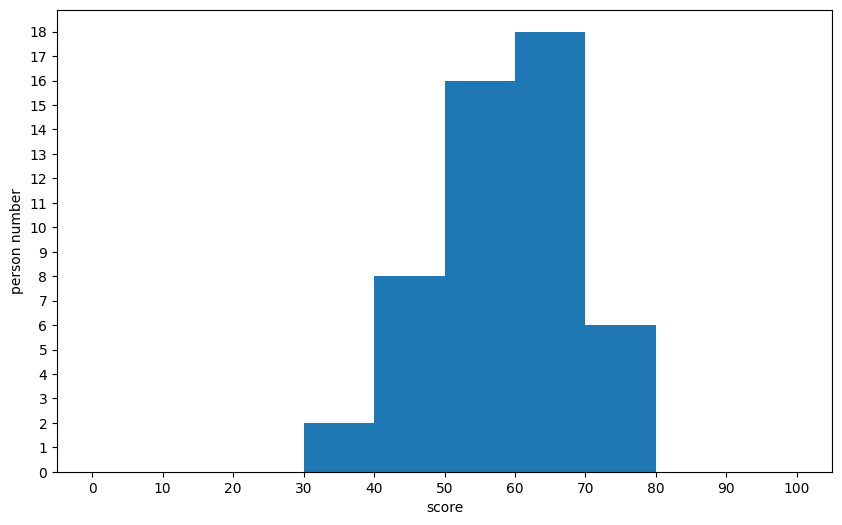

In [67]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_yticks(np.arange(0, freq.max() + 1))

plt.show()

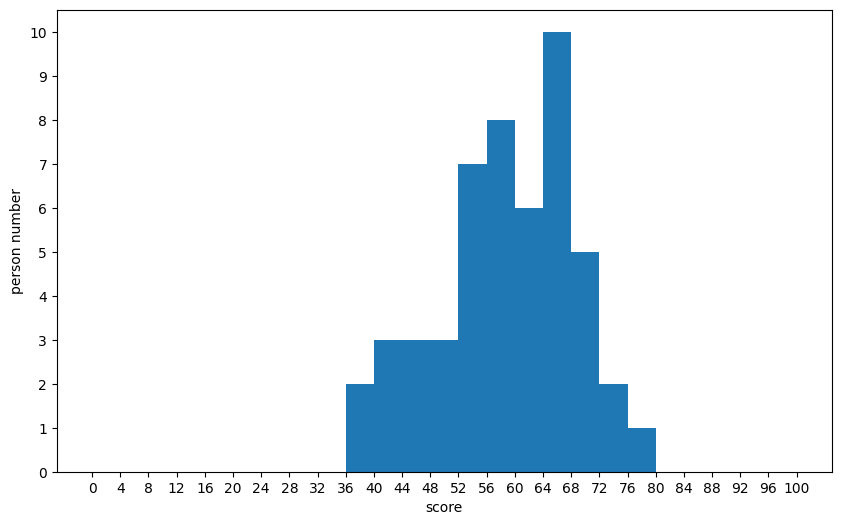

In [68]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins = 25, range = (0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25 + 1))
ax.set_yticks(np.arange(0, freq.max() + 1))

plt.show()

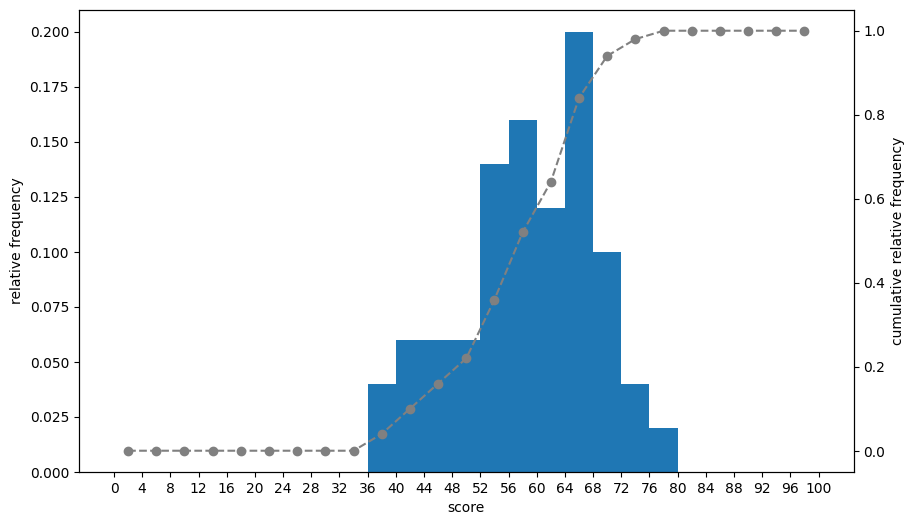

In [69]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

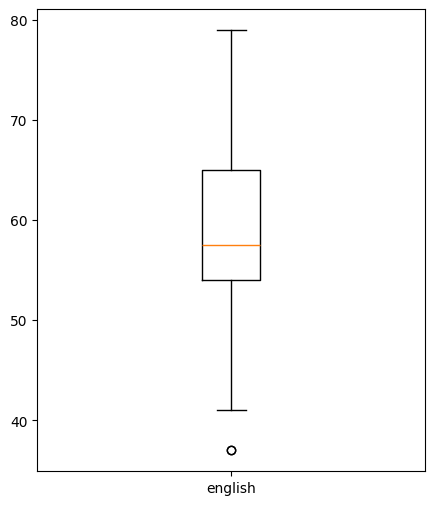

In [70]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, tick_labels = ['english'])

plt.show()

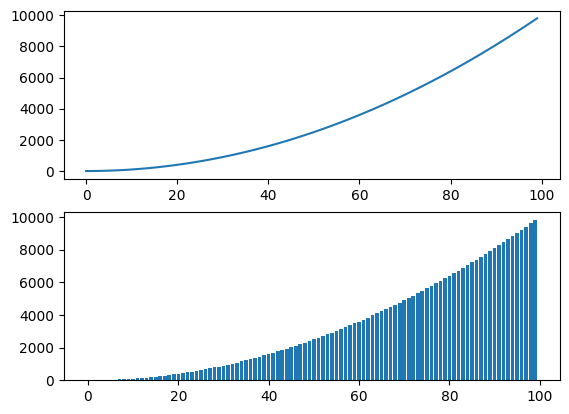

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
x = range(0, 100)
y = [v * v for v in x]
ax1.plot(x, y)
ax2.bar(x, y)
plt.show()